# Minimize precision 2 Monte Carlo Booogalooo

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

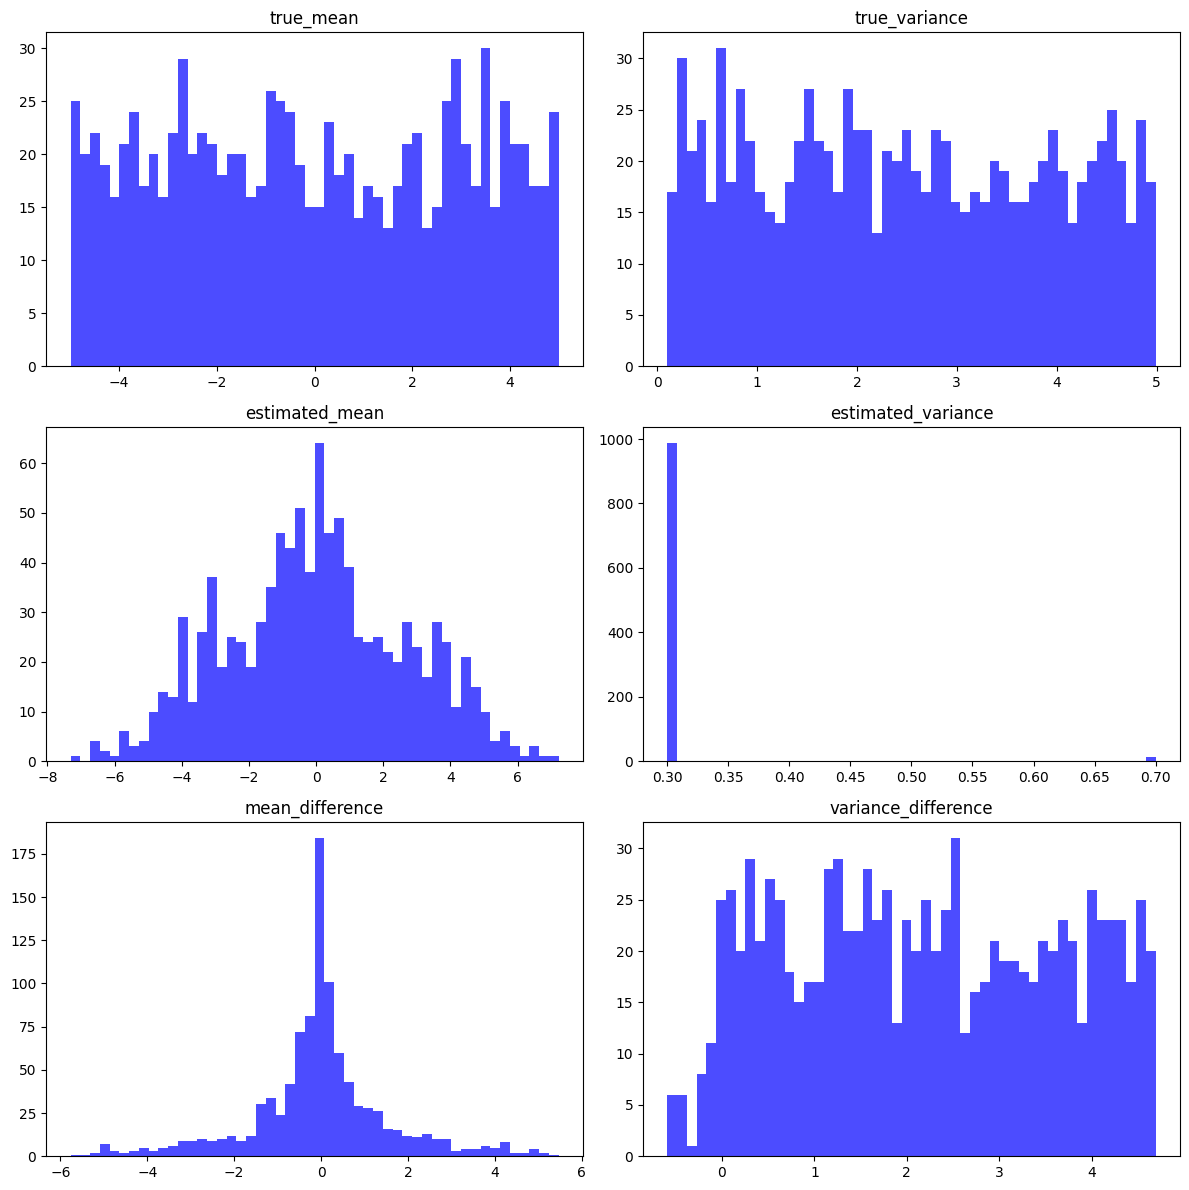

In [98]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pyplot as plt

def negative_log_likelihood(params, data):
    mu, sigma = params
    T = len(data)
    # Normal distribution's log likelihood
    lik = 0
    for t in range(T):
        lik +=  np.exp(-(0.5*np.log(np.pi) + 0.5*np.log(sigma**2) + 0.5*((data[t]-mu)**2)/sigma**2))
    return -np.sum(lik)

def estimate_parameters(data):
    # Initial guesses for mu and sigma
    initial_params = [0, 0.7]
    bounds = [(None, None), (0.3, None)]
    # Minimize the negative log-likelihood
    result = optimize.minimize(negative_log_likelihood, initial_params, args=(data,), method='L-BFGS-B', bounds=bounds)
    mu_est, sigma_est = result.x
    return mu_est, sigma_est

results = []

for _ in range(1000):
    # Randomly choose mean and variance
    true_mu = np.random.uniform(-5, 5)
    true_sigma = np.random.uniform(0.1, 5)

    # Generate data
    data = np.random.normal(true_mu, true_sigma, 100)

    # Estimate parameters
    mu_est, sigma_est = estimate_parameters(data)

    # Store results
    results.append({
        "true_mean": true_mu,
        "true_variance": true_sigma,  # Variance is the square of the standard deviation
        "estimated_mean": mu_est,
        "estimated_variance": sigma_est,  # Variance is the square of the standard deviation
        "mean_difference": true_mu - mu_est,
        "variance_difference": true_sigma - sigma_est
    })
    print(_)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot histograms
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
cols = ['true_mean', 'true_variance', 'estimated_mean', 'estimated_variance', 'mean_difference', 'variance_difference']

for ax, col in zip(axes, cols):
    ax.hist(results_df[col], bins=50, alpha=0.7, color='blue')
    ax.set_title(col)

plt.tight_layout()
plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


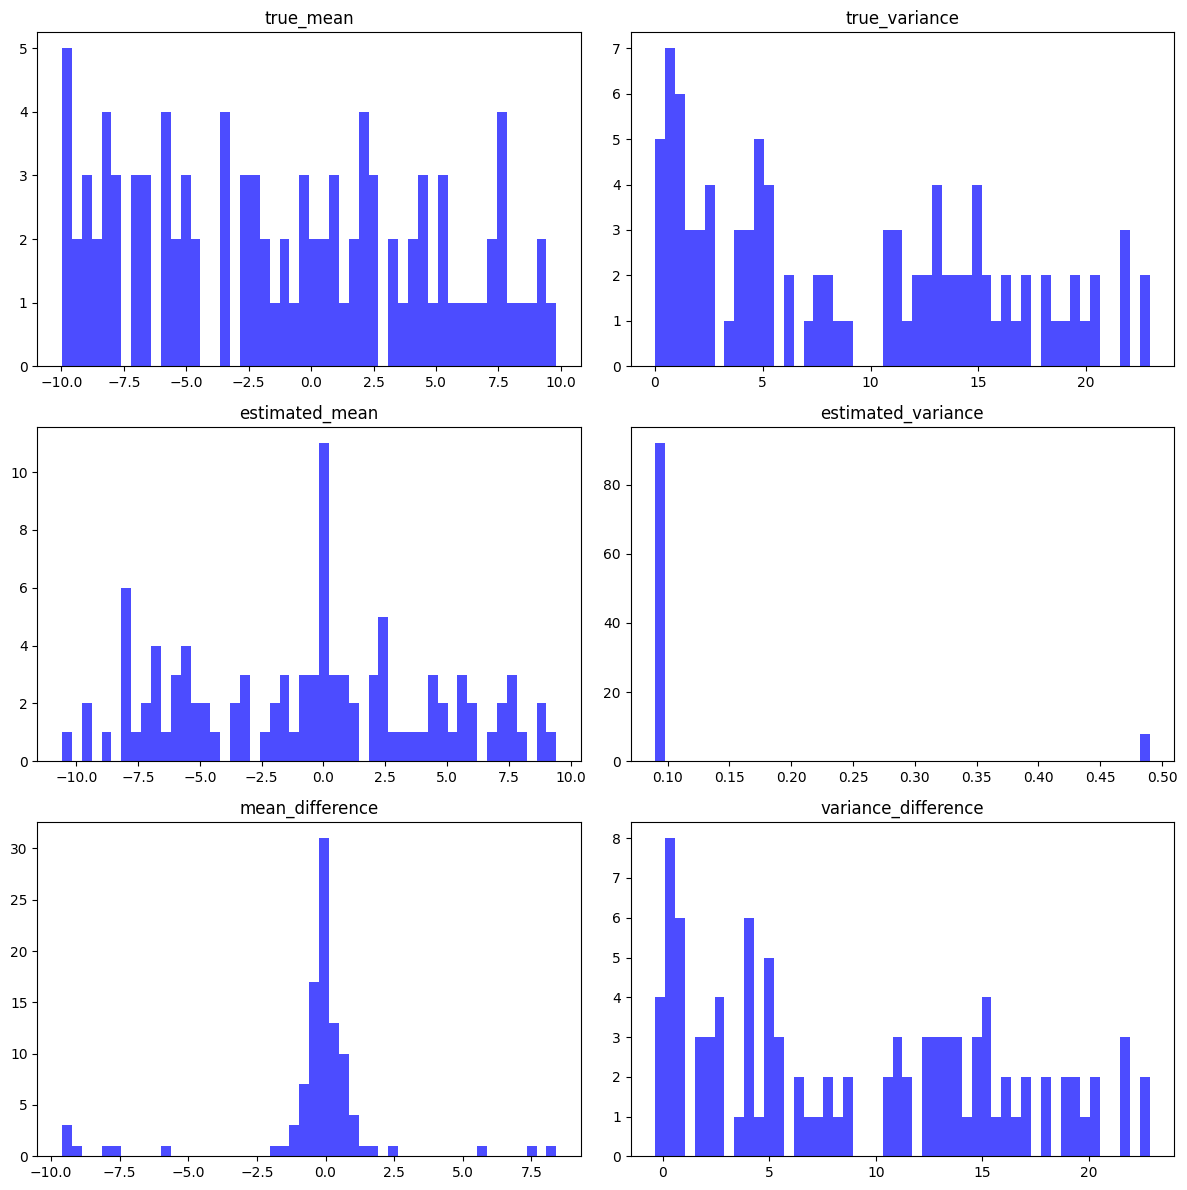

In [99]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pyplot as plt

def negative_log_likelihood(params, data):
    mu, sigma = params
    T = len(data)
    # Normal distribution's log likelihood
    lik = 0
    for t in range(T):
        lik +=  np.exp(-0.5*np.log(np.pi) - 0.5*np.log(sigma**2) - 0.5*((data[t]-mu)**2)/sigma**2)
    return -np.sum(lik)

def estimate_parameters(data):
    # Initial guesses for mu and sigma
    initial_params = [0, 0.7]
    bounds = [(None, None), (0.3, None)]
    # Minimize the negative log-likelihood
    result = optimize.minimize(negative_log_likelihood, initial_params, args=(data,), method='L-BFGS-B', bounds=bounds)
    mu_est, sigma_est = result.x
    return mu_est, sigma_est

results = []

for _ in range(100):
    # Randomly choose mean and variance
    true_mu = np.random.uniform(-10, 10)
    true_sigma = np.random.uniform(0.1, 5)

    # Generate data from two distributions
    data1 = np.random.normal(true_mu, true_sigma * 0.8, 500) # Half data from distribution with sd = 0.8 * true_sigma
    data2 = np.random.normal(true_mu, true_sigma * 1.2, 500) # Half data from distribution with sd = 1.2 * true_sigma
    data = np.concatenate([data1, data2]) # Combine data

    # Estimate parameters
    mu_est, sigma_est = estimate_parameters(data)

    # Store results
    results.append({
        "true_mean": true_mu,
        "true_variance": true_sigma**2,  # Variance is the square of the standard deviation
        "estimated_mean": mu_est,
        "estimated_variance": sigma_est**2,  # Variance is the square of the standard deviation
        "mean_difference": true_mu - mu_est,
        "variance_difference": true_sigma**2 - sigma_est**2
    })
    print(_)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot histograms
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
cols = ['true_mean', 'true_variance', 'estimated_mean', 'estimated_variance', 'mean_difference', 'variance_difference']

for ax, col in zip(axes, cols):
    ax.hist(results_df[col], bins=50, alpha=0.7, color='blue')
    ax.set_title(col)

plt.tight_layout()
plt.show()


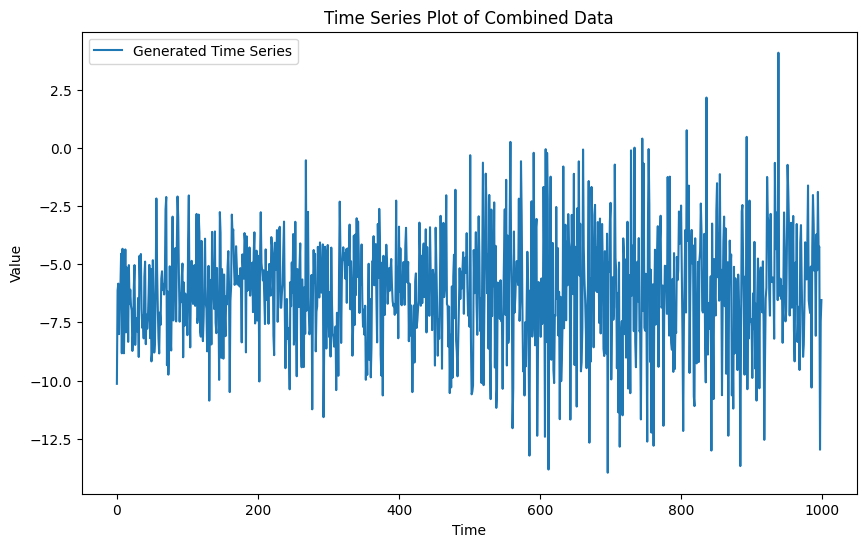

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
true_mu = np.random.uniform(-10, 10)
true_sigma = np.random.uniform(0.1, 5)

# Generate data from two distributions
data1 = np.random.normal(true_mu, true_sigma * 0.8, 500) # Half data from distribution with sd = 0.8 * true_sigma
data2 = np.random.normal(true_mu, true_sigma * 1.2, 500) # Half data from distribution with sd = 1.2 * true_sigma
data = np.concatenate([data1, data2]) # Combine data

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(data, label='Generated Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot of Combined Data')
plt.legend()
plt.show()


/tmp/ipykernel_245742/1157232561.py:10: RuntimeWarning: divide by zero encountered in log
  lik += np.exp(-0.5*np.log(np.pi) - 0.5*np.log(sigma**2) - 0.5*((data[t]-mu)**2)/sigma**2)
/tmp/ipykernel_245742/1157232561.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  lik += np.exp(-0.5*np.log(np.pi) - 0.5*np.log(sigma**2) - 0.5*((data[t]-mu)**2)/sigma**2)
/tmp/ipykernel_245742/1157232561.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  lik += np.exp(-0.5*np.log(np.pi) - 0.5*np.log(sigma**2) - 0.5*((data[t]-mu)**2)/sigma**2)


True Variance: 3.5602125054199893
Estimated Variance: 0.7
Estimated Standard Deviation: 0.8366600265340756
Numpy Variance: 13.180899602135517


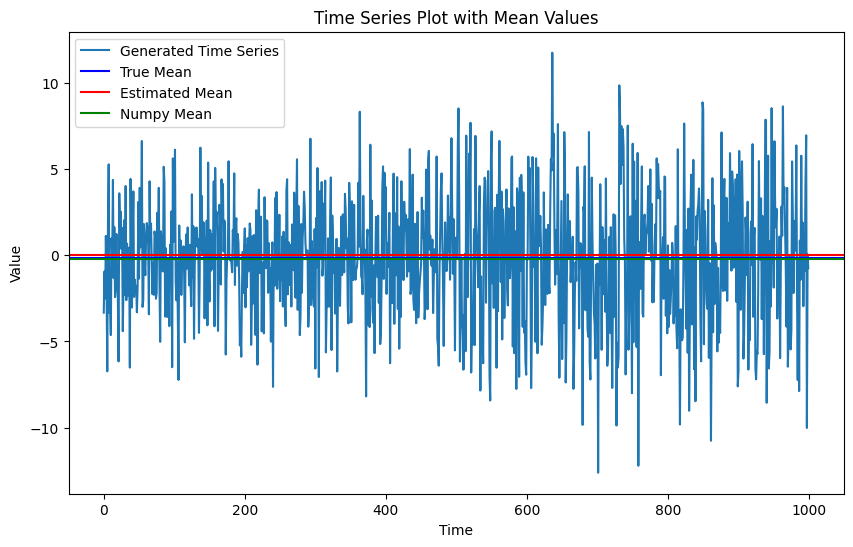

In [104]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

def negative_log_likelihood(params, data):
    mu, sigma = params
    T = len(data)
    lik = 0
    for t in range(T):
        lik += np.exp(-0.5*np.log(np.pi) - 0.5*np.log(sigma**2) - 0.5*((data[t]-mu)**2)/sigma**2)
    return -np.sum(lik)

def estimate_parameters(data):
    initial_params = [0, 0.7]
    bounds = [(None, None), (0, None)]
    result = optimize.minimize(negative_log_likelihood, initial_params, args=(data,), method='L-BFGS-B', bounds=bounds)
    mu_est, sigma_est = result.x
    return mu_est, sigma_est

# Generate data
true_mu = np.random.uniform(-10, 10)
true_sigma = np.random.uniform(0.1, 5)
data1 = np.random.normal(true_mu, true_sigma * 0.8, 500)
data2 = np.random.normal(true_mu, true_sigma * 1.2, 500)
data = np.concatenate([data1, data2])

# Estimate parameters
mu_est, sigma_est = estimate_parameters(data)

# Calculate numpy mean and variance
numpy_mean = np.mean(data)
numpy_variance = np.var(data)

# Print variances
print(f"True Variance: {true_sigma}")
print(f"Estimated Variance: {sigma_est}")
print(f"Estimated Standard Deviation: {sigma_est**0.5}")
print(f"Numpy Variance: {numpy_variance}")

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(data, label='Generated Time Series')
plt.axhline(y=true_mu, color='blue', linestyle='-', label='True Mean')
plt.axhline(y=mu_est, color='red', linestyle='-', label='Estimated Mean')
plt.axhline(y=numpy_mean, color='green', linestyle='-', label='Numpy Mean')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot with Mean Values')
plt.legend()
plt.show()


We are at: 0, that is 0.0 pct.
We are at: 100, that is 0.1 pct.
We are at: 200, that is 0.2 pct.
We are at: 300, that is 0.3 pct.
We are at: 400, that is 0.4 pct.
We are at: 500, that is 0.5 pct.
We are at: 600, that is 0.6 pct.
We are at: 700, that is 0.7000000000000001 pct.
We are at: 800, that is 0.8 pct.
We are at: 900, that is 0.8999999999999999 pct.
We are at: 1000, that is 1.0 pct.
We are at: 1100, that is 1.0999999999999999 pct.
We are at: 1200, that is 1.2 pct.
We are at: 1300, that is 1.3 pct.
We are at: 1400, that is 1.4000000000000001 pct.
We are at: 1500, that is 1.5 pct.
We are at: 1600, that is 1.6 pct.
We are at: 1700, that is 1.7000000000000002 pct.
We are at: 1800, that is 1.7999999999999998 pct.
We are at: 1900, that is 1.9 pct.
We are at: 2000, that is 2.0 pct.
We are at: 2100, that is 2.1 pct.
We are at: 2200, that is 2.1999999999999997 pct.
We are at: 2300, that is 2.3 pct.
We are at: 2400, that is 2.4 pct.
We are at: 2500, that is 2.5 pct.
We are at: 2600, that i

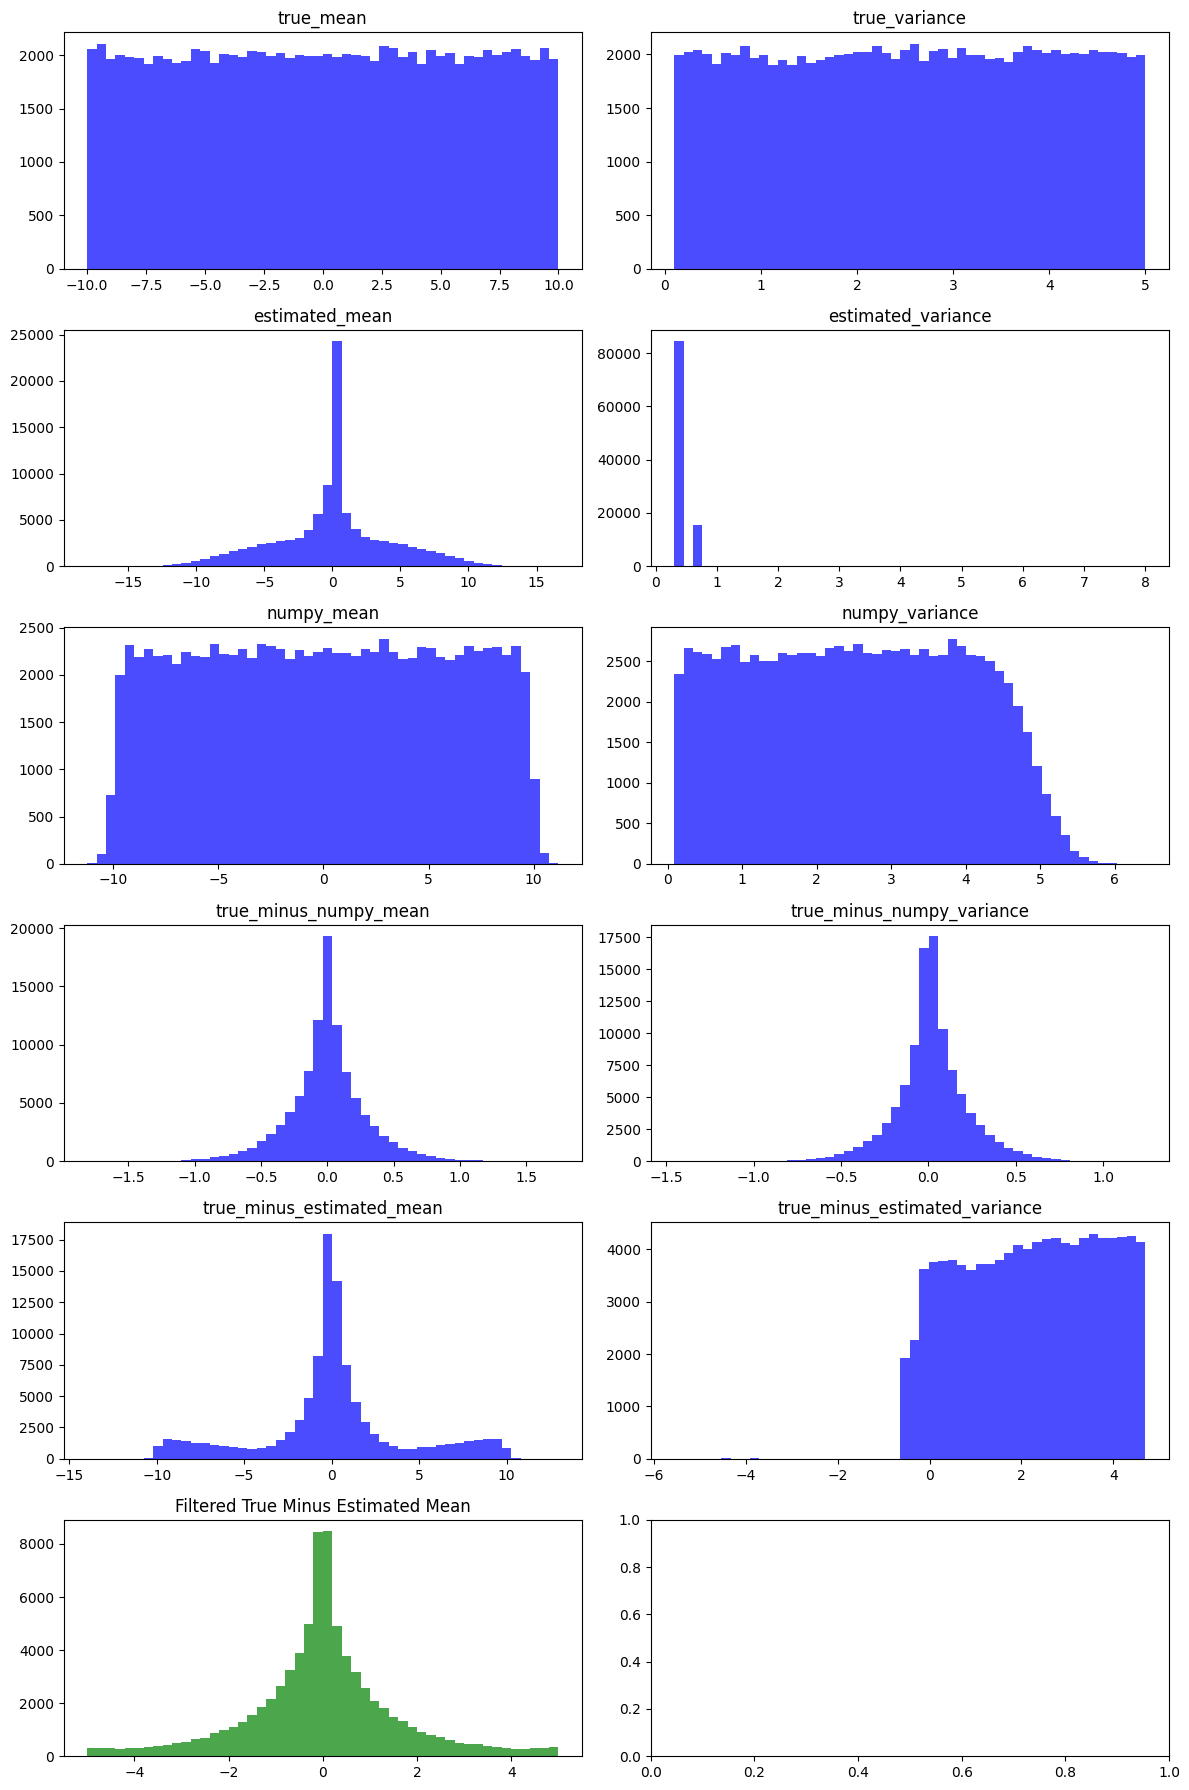

In [117]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pyplot as plt

def negative_log_likelihood(params, data):
    mu, sigma = params
    T = len(data)
    lik = 0
    for t in range(T):
        lik +=  np.exp(-0.5*np.log(np.pi) - 0.5*np.log(sigma**2) - 0.5*((data[t]-mu)**2)/sigma**2)
    return -np.sum(lik)

def estimate_parameters(data):
    initial_params = [0, 0.7]
    bounds = [(None, None), (0.3, None)]
    result = optimize.minimize(negative_log_likelihood, initial_params, args=(data,), method='L-BFGS-B', bounds=bounds)
    mu_est, sigma_est = result.x
    return mu_est, sigma_est

results = []
num_obs = 100000
for _ in range(num_obs):
    true_mu = np.random.uniform(-10, 10)
    true_sigma = np.random.uniform(0.1, 5)

    data = np.random.normal(true_mu, true_sigma, 100)

    mu_est, sigma_est = estimate_parameters(data)
    numpy_mean = np.mean(data)
    numpy_variance = np.var(data)**0.5

    results.append({
        "true_mean": true_mu,
        "true_variance": true_sigma,
        "estimated_mean": mu_est,
        "estimated_variance": sigma_est,
        "numpy_mean": numpy_mean,
        "numpy_variance": numpy_variance,
        "true_minus_numpy_mean": true_mu - numpy_mean,
        "true_minus_numpy_variance": true_sigma - numpy_variance,
        "true_minus_estimated_mean": true_mu - mu_est,
        "true_minus_estimated_variance": true_sigma - sigma_est
        
    })
    if _ % 100 == 0:
        print(f'We are at: {_}, that is {round(_/num_obs,3)*100} pct.')
results_df = pd.DataFrame(results)

# New plot for true minus estimated mean with values in range -5 to 5
filtered_diff = results_df["true_minus_estimated_mean"][(results_df["true_minus_estimated_mean"] > -5) & (results_df["true_minus_estimated_mean"] < 5)]

fig, axes = plt.subplots(6, 2, figsize=(12, 18))
axes = axes.flatten()
cols = ['true_mean', 'true_variance', 'estimated_mean', 'estimated_variance', 'numpy_mean', 'numpy_variance', 'true_minus_numpy_mean', 'true_minus_numpy_variance', 'true_minus_estimated_mean', 'true_minus_estimated_variance']

for ax, col in zip(axes[:-2], cols):
    ax.hist(results_df[col], bins=50, alpha=0.7, color='blue')
    ax.set_title(col)

# Plotting the filtered difference
axes[-2].hist(filtered_diff, bins=50, alpha=0.7, color='green')
axes[-2].set_title('Filtered True Minus Estimated Mean')

plt.tight_layout()
plt.show()


In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from scipy.optimize import minimize

def simulate_ar1(mean, phi, sigma, n=100):
    """ Simulate an AR(1) process """
    # Initialize the array
    y = np.zeros(n)
    # Set the first value
    y[0] = np.random.normal(mean, sigma)
    # Generate the AR(1) process
    for t in range(1, n):
        y[t] = mean + phi * (y[t-1] - mean) + np.random.normal(0, sigma)
    return y

def estimate_ar1_statsmodels(y):
    """ Estimate AR(1) parameters using statsmodels """
    model = AutoReg(y, lags=1, trend='c')
    model_fit = model.fit()
    return model_fit.params

def estimate_ar1_scipy(y):
    """ Estimate AR(1) parameters using scipy minimize """
    # Objective function to minimize
    def objective(params):
        mean, phi, sigma = params
        T = len(y)
        log_likelihood = 0
        
        # Looping through each time step
        for t in range(1, T):  # Starting from 1 since we need y[t-1]
            residual = y[t] - (mean + phi * y[t-1])
            log_likelihood += -0.5 * np.log(2 * np.pi) - np.log(sigma**2) - 0.5 * (residual**2) / (sigma**2)
    
        # Since we want to maximize the log-likelihood, but scipy.minimize performs minimization, we return the negative log-likelihood
        return -log_likelihood

    # Initial guess
    initial_guess = [0,0.5, 1] # [np.mean(y), 0.5, np.std(y)]
    my_bounds =[(-10,10),(-1,1),(0.001,10)]
    result = minimize(objective, initial_guess, method='L-BFGS-B', bounds = my_bounds)
    mean, phi, _ = result.x
    sigma = np.sqrt(result.fun)
    return mean, phi, sigma

# Parameters for Monte Carlo simulation
num_simulations = 100
n = 100  # Number of observations in each simulation

# Dataframe to store results
results_df = pd.DataFrame(columns=['True Mean', 'True Phi', 'True Sigma',
                                   'SM Mean', 'SM Phi', 'SM Sigma',
                                   'SciPy Mean', 'SciPy Phi', 'SciPy Sigma'])
results = []
# Running the simulations
for _ in range(num_simulations):
    # Randomly choose parameters
    true_mean = np.random.uniform(-1, 1)
    true_phi = np.random.uniform(-0.9, 0.9)  # To ensure stationarity
    true_sigma = np.random.uniform(0.1, 10)

    # Generate AR(1) process
    y = simulate_ar1(true_mean, true_phi, true_sigma, n)

    # Estimate parameters using statsmodels
    sm_params = estimate_ar1_statsmodels(y)
    sm_mean, sm_phi = sm_params
    sm_sigma = np.sqrt(np.var(y - (sm_mean + sm_phi * np.roll(y, 1))))

    # Estimate parameters using scipy minimize
    scipy_mean, scipy_phi, scipy_sigma = estimate_ar1_scipy(y)
    scipy_sigma = scipy_sigma**0.5

    # Append results to the list
    results.append([true_mean, true_phi, true_sigma, sm_mean, sm_phi, sm_sigma, scipy_mean, scipy_phi, scipy_sigma])

    if _%10 == 0:
        print(f'We are at: {_}, that is {round(_/num_simulations,3)*100} pct.')
results_df = pd.DataFrame(results, columns=['True Mean', 'True Phi', 'True Sigma', 'SM Mean', 'SM Phi', 'SM Sigma', 'SciPy Mean', 'SciPy Phi', 'SciPy Sigma'])

# Display the first few rows of the results dataframe
print(results_df)
# Display the first few rows of the results dataframe
# results_df
    

We are at: 0, that is 0.0 pct.
We are at: 10, that is 10.0 pct.


/tmp/ipykernel_245742/3663072937.py:45: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(result.fun)


We are at: 20, that is 20.0 pct.
We are at: 30, that is 30.0 pct.


/tmp/ipykernel_245742/3663072937.py:45: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(result.fun)


We are at: 40, that is 40.0 pct.
We are at: 50, that is 50.0 pct.


/tmp/ipykernel_245742/3663072937.py:45: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(result.fun)


We are at: 60, that is 60.0 pct.
We are at: 70, that is 70.0 pct.


/tmp/ipykernel_245742/3663072937.py:45: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(result.fun)


We are at: 80, that is 80.0 pct.
We are at: 90, that is 90.0 pct.
    True Mean  True Phi  True Sigma   SM Mean    SM Phi  SM Sigma  SciPy Mean  \
0   -0.904993 -0.312993    8.192850 -1.215900 -0.397814  8.026921   -1.215891   
1   -0.565416 -0.054372    3.644272 -0.187416  0.042367  3.620161   -0.187448   
2   -0.374609 -0.786299    6.496755 -0.350764 -0.783822  6.450492   -0.350769   
3   -0.891718 -0.196553    6.673621 -0.817223 -0.012085  6.792972   -0.817239   
4   -0.785546  0.105794    4.464611 -0.498436  0.000151  4.277034   -0.498437   
..        ...       ...         ...       ...       ...       ...         ...   
95  -0.650725 -0.187582    5.563200 -1.363853 -0.156800  5.634152   -1.363815   
96  -0.080678 -0.371840    2.039314 -0.144306 -0.362245  1.873047   -0.144305   
97  -0.177022  0.002569    5.463359  0.597344  0.002014  5.640962    0.597344   
98  -0.306366  0.132300    2.823618 -0.580392  0.131674  3.058462   -0.580390   
99   0.392230 -0.655041    4.922304  0.8133

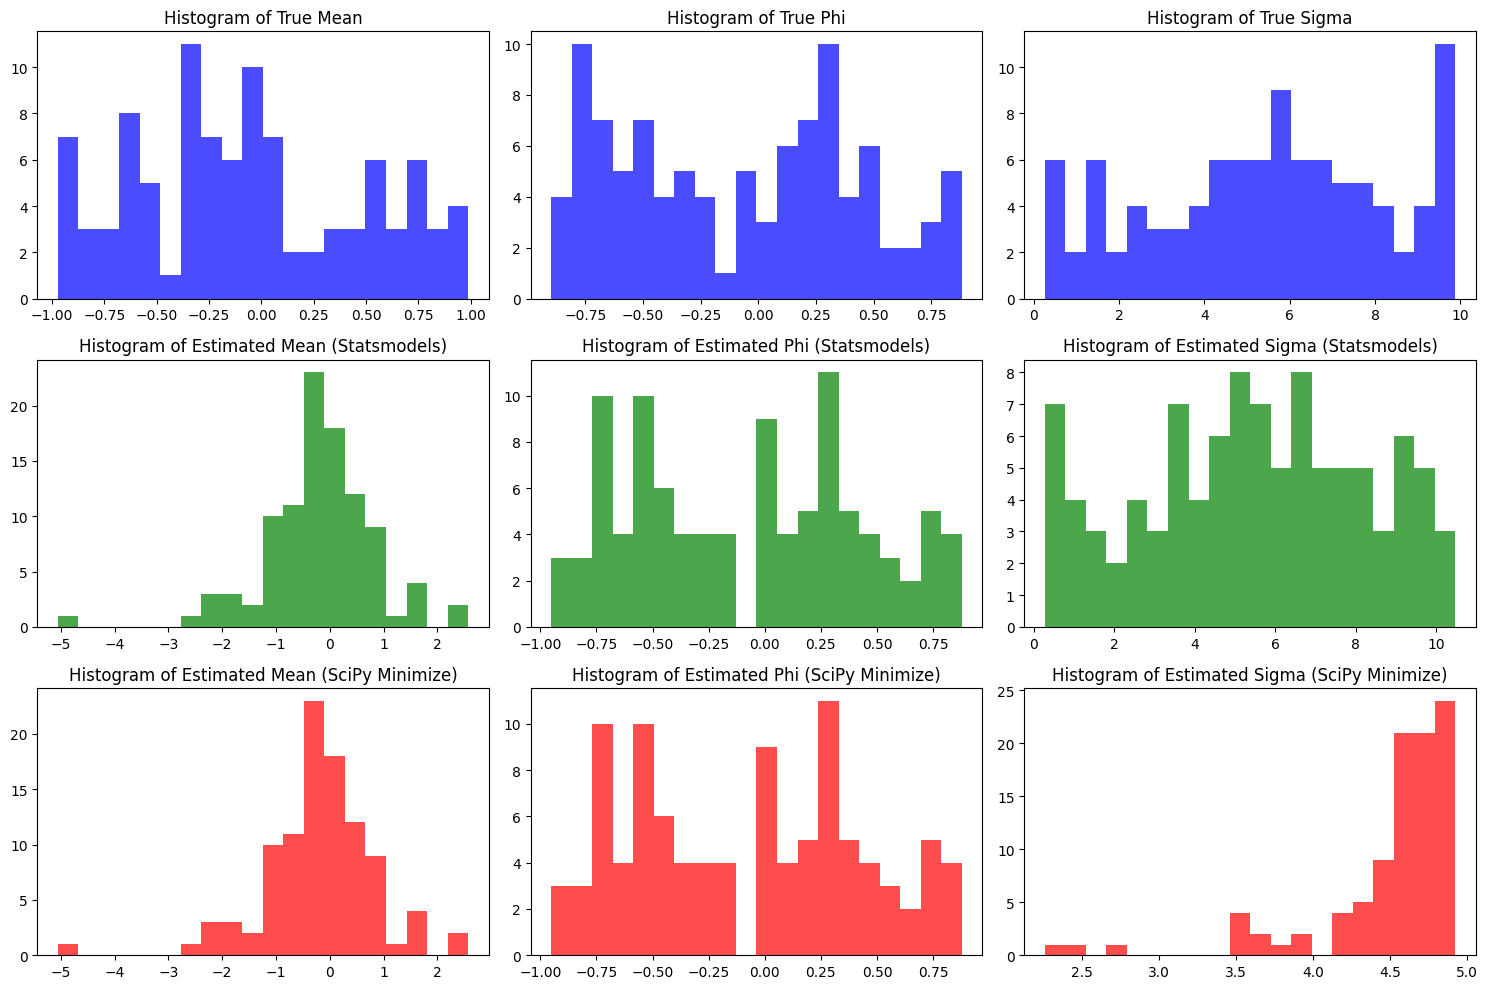

<Figure size 640x480 with 0 Axes>

In [173]:
import matplotlib.pyplot as plt

# Plotting histograms
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Histogram for True Mean
axs[0, 0].hist(results_df['True Mean'], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram of True Mean')

# Histogram for True Phi
axs[0, 1].hist(results_df['True Phi'], bins=20, color='blue', alpha=0.7)
axs[0, 1].set_title('Histogram of True Phi')

# Histogram for True Sigma
axs[0, 2].hist(results_df['True Sigma'], bins=20, color='blue', alpha=0.7)
axs[0, 2].set_title('Histogram of True Sigma')

# Histogram for Estimated Mean (Statsmodels)
axs[1, 0].hist(results_df['SM Mean'], bins=20, color='green', alpha=0.7)
axs[1, 0].set_title('Histogram of Estimated Mean (Statsmodels)')

# Histogram for Estimated Phi (Statsmodels)
axs[1, 1].hist(results_df['SM Phi'], bins=20, color='green', alpha=0.7)
axs[1, 1].set_title('Histogram of Estimated Phi (Statsmodels)')

# Histogram for Estimated Sigma (Statsmodels)
axs[1, 2].hist(results_df['SM Sigma'], bins=20, color='green', alpha=0.7)
axs[1, 2].set_title('Histogram of Estimated Sigma (Statsmodels)')

# Histogram for Estimated Mean (SciPy Minimize)
axs[2, 0].hist(results_df['SciPy Mean'], bins=20, color='red', alpha=0.7)
axs[2, 0].set_title('Histogram of Estimated Mean (SciPy Minimize)')

# Histogram for Estimated Phi (SciPy Minimize)
axs[2, 1].hist(results_df['SciPy Phi'], bins=20, color='red', alpha=0.7)
axs[2, 1].set_title('Histogram of Estimated Phi (SciPy Minimize)')

# Histogram for Estimated Sigma (SciPy Minimize)
axs[2, 2].hist(results_df['SciPy Sigma'], bins=20, color='red', alpha=0.7)
axs[2, 2].set_title('Histogram of Estimated Sigma (SciPy Minimize)')

plt.tight_layout()
plt.show()
# Calculating differences
results_df['Diff Mean (SM)'] = results_df['True Mean'] - results_df['SM Mean']
results_df['Diff Phi (SM)'] = results_df['True Phi'] - results_df['SM Phi']
results_df['Diff Sigma (SM)'] = results_df['True Sigma'] - results_df['SM Sigma']

results_df['Diff Mean (SciPy)'] = results_df['True Mean'] - results_df['SciPy Mean']
results_df['Diff Phi (SciPy)'] = results_df['True Phi'] - results_df['SciPy Phi']
results_df['Diff Sigma (SciPy)'] = results_df['True Sigma'] - results_df['SciPy Sigma']



plt.tight_layout()
plt.show()


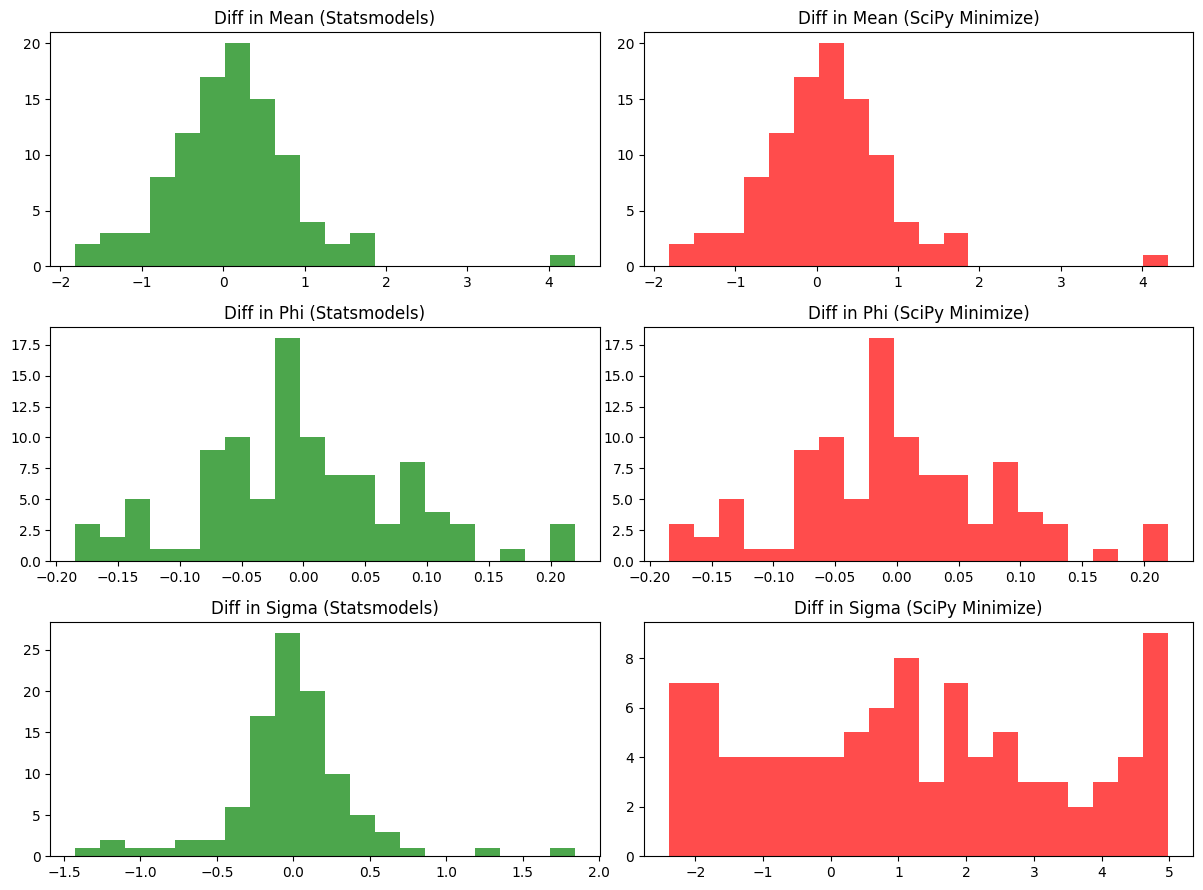

In [174]:
# Calculating differences
results_df['Diff Mean (SM)'] = results_df['True Mean'] - results_df['SM Mean']
results_df['Diff Phi (SM)'] = results_df['True Phi'] - results_df['SM Phi']
results_df['Diff Sigma (SM)'] = results_df['True Sigma'] - results_df['SM Sigma']

results_df['Diff Mean (SciPy)'] = results_df['True Mean'] - results_df['SciPy Mean']
results_df['Diff Phi (SciPy)'] = results_df['True Phi'] - results_df['SciPy Phi']
results_df['Diff Sigma (SciPy)'] = results_df['True Sigma'] - results_df['SciPy Sigma']

# Plotting histograms of differences
fig, axs = plt.subplots(3, 2, figsize=(12, 9))

# Histograms for Differences in Mean
axs[0, 0].hist(results_df['Diff Mean (SM)'], bins=20, color='green', alpha=0.7)
axs[0, 0].set_title('Diff in Mean (Statsmodels)')

axs[0, 1].hist(results_df['Diff Mean (SciPy)'], bins=20, color='red', alpha=0.7)
axs[0, 1].set_title('Diff in Mean (SciPy Minimize)')

# Histograms for Differences in Phi
axs[1, 0].hist(results_df['Diff Phi (SM)'], bins=20, color='green', alpha=0.7)
axs[1, 0].set_title('Diff in Phi (Statsmodels)')

axs[1, 1].hist(results_df['Diff Phi (SciPy)'], bins=20, color='red', alpha=0.7)
axs[1, 1].set_title('Diff in Phi (SciPy Minimize)')

# Histograms for Differences in Sigma
axs[2, 0].hist(results_df['Diff Sigma (SM)'], bins=20, color='green', alpha=0.7)
axs[2, 0].set_title('Diff in Sigma (Statsmodels)')

axs[2, 1].hist(results_df['Diff Sigma (SciPy)'], bins=20, color='red', alpha=0.7)
axs[2, 1].set_title('Diff in Sigma (SciPy Minimize)')

plt.tight_layout()
plt.show()
